# Customer Clustering 

In [10]:
import pandas as pd

file_path = 'Customer_data.csv'
df = pd.read_csv(file_path)


In [11]:
from datetime import datetime

def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

def categorize_investor(row):
    score = 0
    # Previous Investment Experience
    score += 1 if row['Previous Investment Experience'] == 'Yes' else 0
    
    # Age Scoring
    age = calculate_age(datetime.strptime(row['Date of Birth'], '%Y-%m-%d'))
    if age < 25:
        score += 3  # Very young investors are more aggressive
    elif age < 35:
        score += 2
    elif age < 55:
        score += 1  # Middle-aged might be moderate
    
    # Income Level Scoring
    if row['Annual Income'] > 1000000:
        score += 1
    elif row['Annual Income'] < 500000:
        score += 2
    
    # Investment Amount Scoring
    if row['Amount to Invest'] > 200000:
        score += 2
    elif row['Amount to Invest'] < 50000:
        score += 1
    
    # Expected Rate of Return
    if row['Expected Rate of Return'] == '>10%':
        score += 2
    elif row['Expected Rate of Return'] == '5-10%':
        score += 1

    # Term of Investment Scoring
    if row['Term of Investment'] == 'Short Term':
        score += 2
    elif row['Term of Investment'] == 'Medium Term':
        score += 1
    
    # Modified Retirement Goals Scoring
    if 'college' in row['Retirement Goals'] or 'vacation' in row['Retirement Goals']:
        score += 2
    elif 'house' in row['Retirement Goals'] or 'business venture' in row['Retirement Goals']:
        score += 1

    # Employment Type Scoring
    if row['Employment Type'] == 'Unemployed':
        score += 2
    elif row['Employment Type'] in ['Self-Employed', 'Employed']:
        score += 1

    # Increased threshold for 'Aggressive'
    if score >= 8:
        return 'Aggressive'
    elif score >= 5:
        return 'Moderate'
    else:
        return 'Conservative'


In [12]:
df['Investor Type'] = df.apply(categorize_investor, axis=1)

In [13]:
# Mapping the investor types to numbers for clustering
investor_type_encoding = {'Aggressive': 2, 'Moderate': 1, 'Conservative': 0}
df['Investor Type Encoded'] = df['Investor Type'].map(investor_type_encoding)


In [14]:
from sklearn.cluster import KMeans

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df[['Investor Type Encoded']].values)
df['Cluster'] = clusters

C:\Users\iamra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iamra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [15]:
# Define the mapping
cluster_label_mapping = {1: 'H', 0: 'M', 2: 'L'}

# Apply the mapping to the cluster assignment
df['Cluster Label'] = df['Cluster'].map(cluster_label_mapping)

# Verify the mapping
print(df[['Investor Type', 'Cluster', 'Cluster Label']].head())


  Investor Type  Cluster Cluster Label
0      Moderate        0             M
1    Aggressive        1             H
2      Moderate        0             M
3    Aggressive        1             H
4    Aggressive        1             H


In [17]:
# Save the DataFrame to a CSV file

df.to_csv('Clustered_Data_final.csv', index=False)

C:\Users\iamra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\iamra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


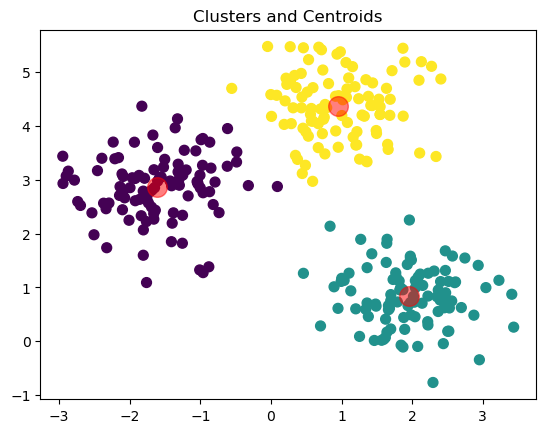

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic two-dimensional data
X, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)  # Cluster centers
plt.title('Clusters and Centroids')
plt.show()


In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming `X` is your features and `labels` are the labels from KMeans
# Replace 'X' with your actual data used for clustering (e.g., scaled_features) and 'labels' with the cluster labels

silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")


Silhouette Score: 0.660
Calinski-Harabasz Index: 912.364
Davies-Bouldin Index: 0.476
